<a href="https://colab.research.google.com/github/Paduspan/breast-cancer-wisconsin/blob/main/BreastCancer_ANN_Keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
names=["ID","Clump_Thickness","Uniform_cell_size","Uniform_cell_shape","Marginal_Adhesion","Single_epithelial_cell_size",
      "Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

import pandas as pd
URL = "https://raw.githubusercontent.com/Paduspan/breast-cancer-wisconsin/main/breast-cancer-wisconsin.data"
df =pd.read_csv(URL, names=names)
print(df.head(10))

        ID  Clump_Thickness  Uniform_cell_size  ...  Normal_Nucleoli  Mitoses  Class
0  1000025                5                  1  ...                1        1      2
1  1002945                5                  4  ...                2        1      2
2  1015425                3                  1  ...                1        1      2
3  1016277                6                  8  ...                7        1      2
4  1017023                4                  1  ...                1        1      2
5  1017122                8                 10  ...                7        1      4
6  1018099                1                  1  ...                1        1      2
7  1018561                2                  1  ...                1        1      2
8  1033078                2                  1  ...                1        5      2
9  1033078                4                  2  ...                1        1      2

[10 rows x 11 columns]


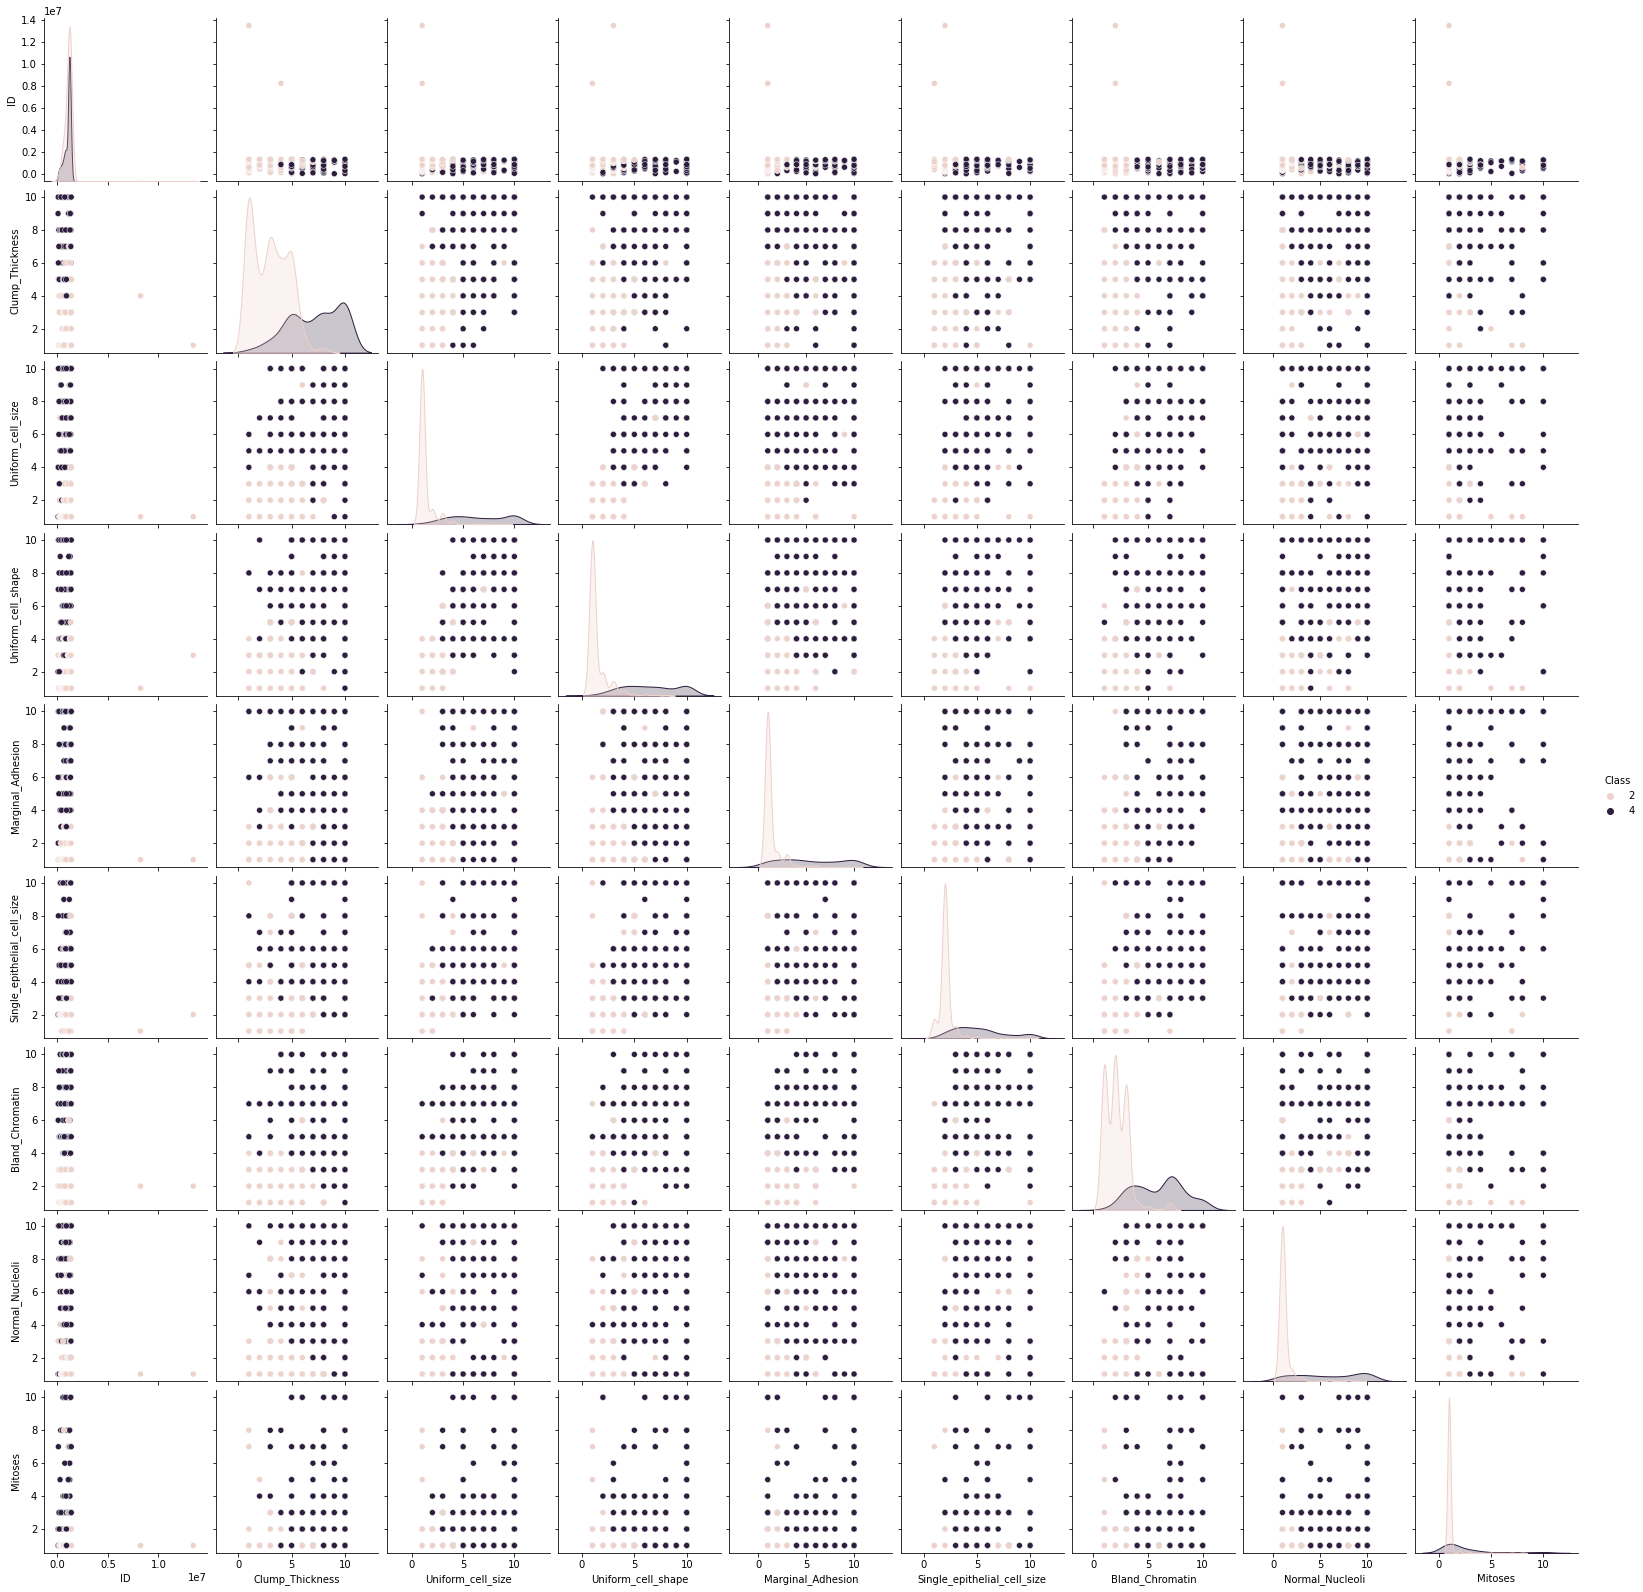

In [ ]:
import seaborn as sns
#pair plot
sns.pairplot(df, hue='Class')

In [ ]:
df.describe()

,ID,Clump_Thickness,Uniform_cell_size,Uniform_cell_shape,Marginal_Adhesion,Single_epithelial_cell_size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.shape

(699, 11)

In [ ]:
df.isnull().sum()

ID                             0
Clump_Thickness                0
Uniform_cell_size              0
Uniform_cell_shape             0
Marginal_Adhesion              0
Single_epithelial_cell_size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# #handling missing values
df.replace('?',-99999,inplace=True)
# #drop ID column
df.drop(['ID'],axis=1,inplace=True)
df.shape

(699, 10)

In [ ]:
df.head(10)

,Clump_Thickness,Uniform_cell_size,Uniform_cell_shape,Marginal_Adhesion,Single_epithelial_cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [ ]:
y = df.iloc[:, -1].values.astype('float')       # Actual class label
X = df.iloc[:, :-1].values.astype('float')       # Feature variable

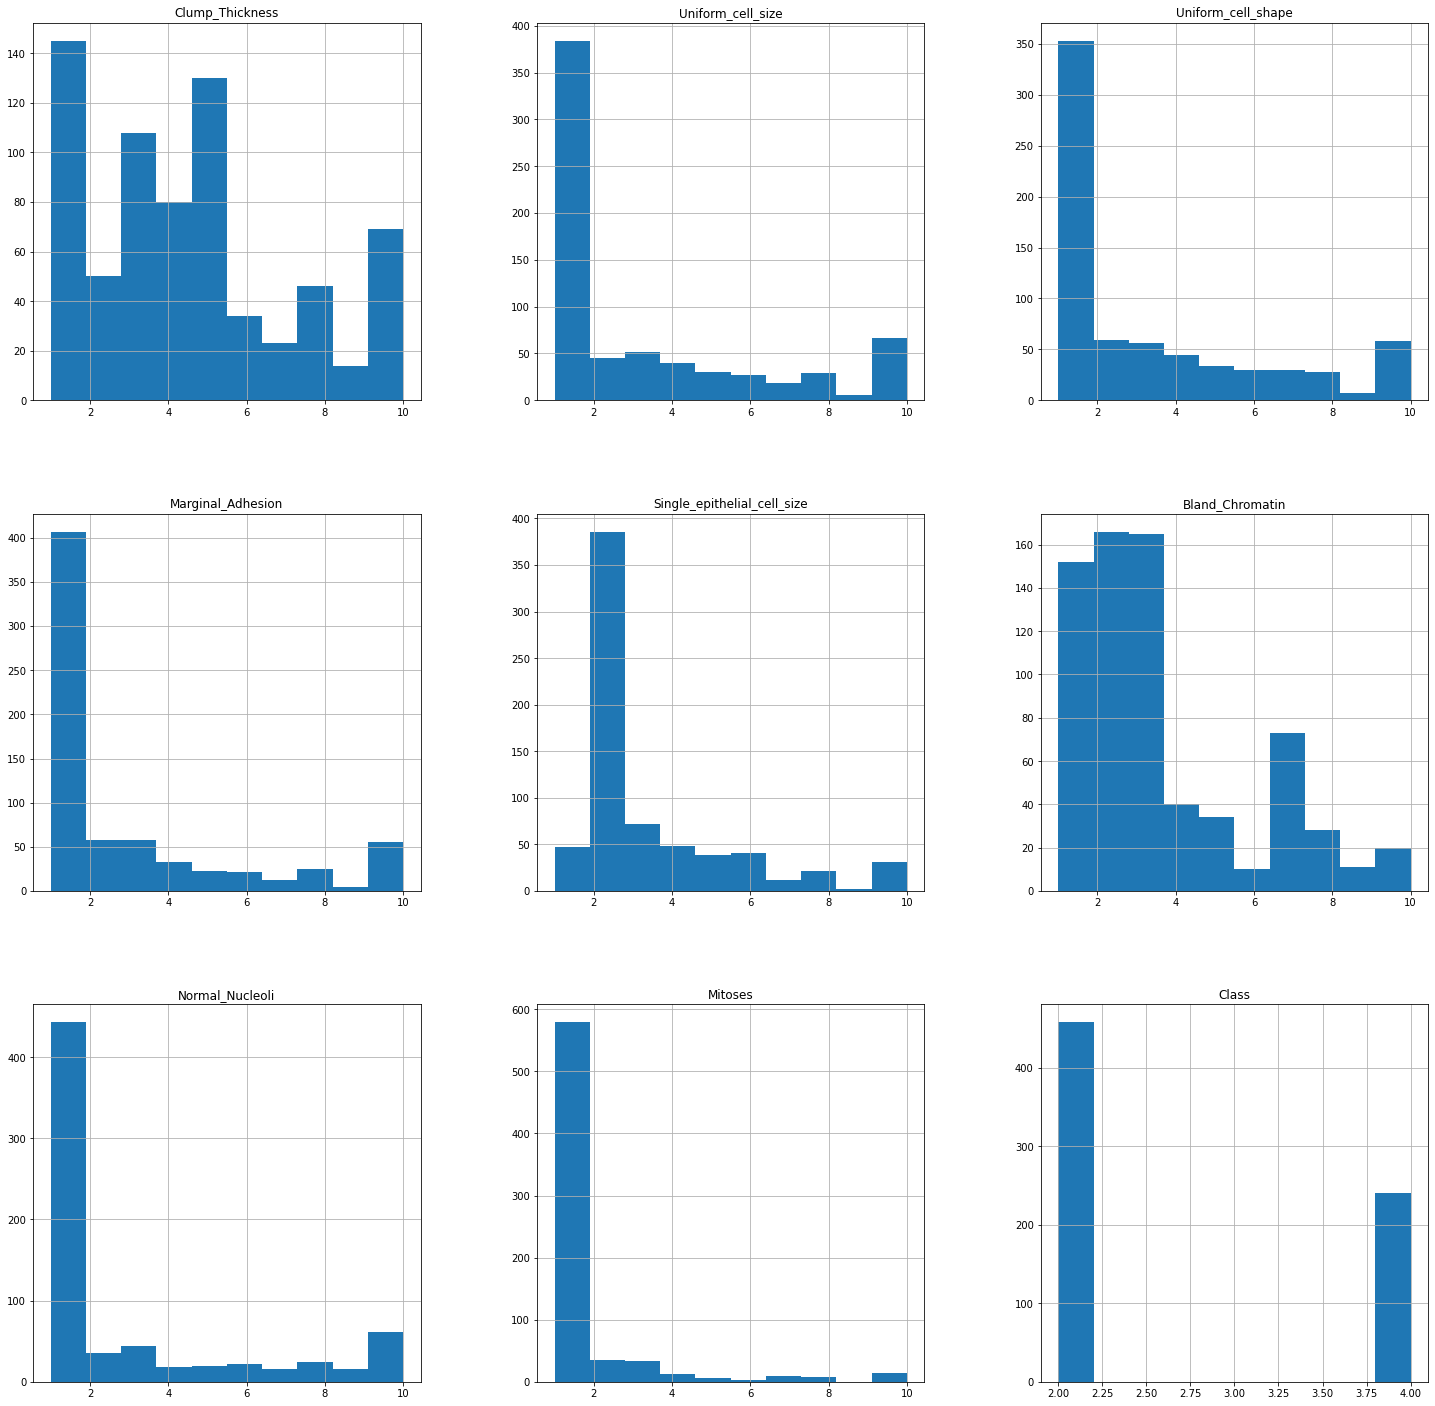

In [ ]:
from matplotlib import pyplot as plt
#Histogram
df.hist(figsize=(25,25))
plt.show()

In [ ]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
#since the object returned is not Dataframe, we have to convert it.
df_scaled = pd.DataFrame(df_scaled, columns= df.columns)
# Class Label encoding M & B to 1 & 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_scaled["Class"] = encoder.fit_transform(y)
print('After Scaling:')
df = df_scaled
df.head(10)

After Scaling:


,Clump_Thickness,Uniform_cell_size,Uniform_cell_shape,Marginal_Adhesion,Single_epithelial_cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,0.152886,-0.179662,-0.611825,-0.343912,0
1,0.206936,0.283845,0.266875,0.768621,1.710106,0.153487,-0.179662,-0.284112,-0.343912,0
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,0.152952,-0.179662,-0.611825,-0.343912,0
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.153086,-0.179662,1.354454,-0.343912,0
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,0.152886,-0.179662,-0.611825,-0.343912,0
5,1.273138,2.251526,2.287222,1.820022,1.710106,0.153487,2.282766,1.354454,-0.343912,1
6,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,0.153487,-0.179662,-0.611825,-0.343912,0
7,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,0.152886,-0.179662,-0.611825,-0.343912,0
8,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,0.152886,-1.000471,-0.611825,1.990014,0
9,-0.148465,-0.372048,-0.743299,-0.633247,-0.549561,0.152886,-0.590067,-0.611825,-0.343912,0


In [ ]:
# print(df.describe().loc[['mean', 'std', 'max'],].round(5).abs())

In [ ]:
from sklearn.model_selection import train_test_split
y = df.iloc[:, -1].values.astype('float')       # Actual class label
X = df.iloc[:, :-1].values.astype('float')       # Feature variable

print(type(y))
print("\n Class of First row : ", y[0])
print("\n Feature Variables of First row of  ""(9 variables)"" : ", X[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size = 0.2, random_state=42)

<class 'numpy.ndarray'>

 Class of First row :  0.0

 Feature Variables of First row of  (9 variables) :  [ 0.20693572 -0.69999505 -0.74329904 -0.63324716 -0.54956136  0.15288559
 -0.17966213 -0.61182504 -0.34391178]


In [ ]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
#Add the first hidden layer
model.add(Dense(9, activation = 'relu', input_dim = 9))
#Add the second hidden layer
model.add(Dense(12, activation = 'relu'))
#Add the third hidden layer
# model.add(Dense(36, activation = 'relu'))
#Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile the model
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the model for 200 epochs
model.fit(X_train, y_train, epochs= 200)

Epoch 1/200
18/18 [==============================] - 0s 940us/step - loss: 0.6804 - accuracy: 0.6115
Epoch 2/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.8083
Epoch 3/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5669 - accuracy: 0.8676
Epoch 4/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.9159
Epoch 5/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.9466
Epoch 6/200
18/18 [==============================] - 0s 973us/step - loss: 0.4012 - accuracy: 0.9414
Epoch 7/200
18/18 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.9548
Epoch 8/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2747 - accuracy: 0.9577
Epoch 9/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.9457
Epoch 10/200
18/18 [==============================] - 0s 999us/step - loss: 0.1987 - accuracy: 0.9559
Epo

In [ ]:
# model.summary()

In [ ]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy : %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy : %.2f%%\n" % (scores[1]*100))

18/18 [==============================] - 0s 837us/step - loss: 0.0576 - accuracy: 0.9803
Training Accuracy : 98.03%

5/5 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9714
Testing Accuracy : 97.14%



Text(33.0, 0.5, 'Actual')

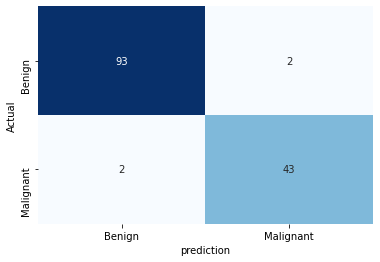

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True,
                 xticklabels = ['Benign' , 'Malignant'],
                 yticklabels = ['Benign' , 'Malignant'],
                 cbar = False, cmap= 'Blues')
ax.set_xlabel("prediction")
ax.set_ylabel("Actual")

Text(0, 0.5, 'True Positive Rate')

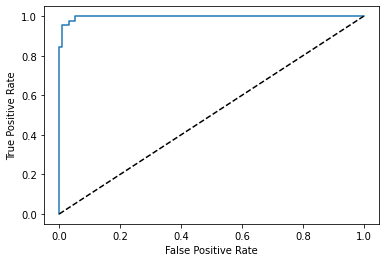

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--', color = 'black') #diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)
print("\n predicted: \n", predicted_classes.T , "\n True Label:  \n", y_test)


 predicted: 
 [[0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0
  0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0
  1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0
  0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0]] 
 True Label:  
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


In [ ]:
new_case= [5,	1,	1,	1,	2,	1,	3,	1,	1]       # first row of dataset
print('new_case :',new_case)
new_case_scaled= preprocessing.scale(new_case)
print('new_case_scaled :', new_case_scaled)
# pred= model.predict(new_case_scaled)
# print(pred)

new_case : [5, 1, 1, 1, 2, 1, 3, 1, 1]
new_case_scaled : [ 2.45094734 -0.59160798 -0.59160798 -0.59160798  0.16903085 -0.59160798
  0.92966968 -0.59160798 -0.59160798]
